## 1 - Test and Visualize models

In [6]:
from model import *

# from batchrun import *

In [7]:
model = InfoSpread (num_nodes=1000, avg_node_degree=8, rewire_prob=0.1, initial_outbreak_size=1, threshold =2, inf_prob_model = 0.5)
#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
for i in range(50):
    model.step()

In [ ]:
df = model.datacollector.get_model_vars_dataframe()

## 2 - Batch Run to find out the determing parameter for rewiring P

In [9]:
 from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"num_nodes": 1000,
               "avg_node_degree": 8,
               "initial_outbreak_size" : 1,
               "threshold" : 2,
               "inf_prob_model" : 0.5,
               }
variable_params = {"rewire_prob": rewire_list}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations= 3,
                        max_steps=50,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

63it [01:30,  1.44s/it]


In [10]:
run_data = batch_run.get_model_vars_dataframe()

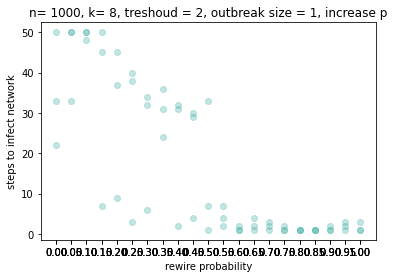

In [11]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("steps to infect network")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

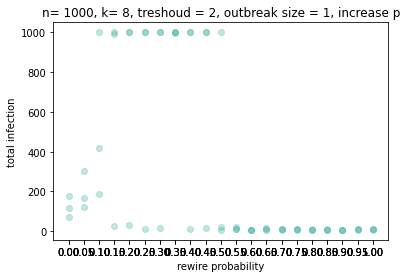

In [12]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("total infection")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

In [ ]:
run_data.to_csv('40_itr_change_p.csv')

In [ ]:
import pandas as pd
df = pd.read_csv('40_itr_change_p.csv')
df

# Appendix - Legacy code

## 1 - Visualizaion for a single step

In [ ]:
model = InfoSpread (num_nodes=1000, avg_node_degree=3, rewire_prob=.3, initial_outbreak_size=1, threshold = 2,)
total_inf = [-1, 0] #buffer item
total_inf.append(number_infected(model))
while( total_inf[len(total_inf)-1] != total_inf[len(total_inf)-2] ):
    model.step()
    total_inf.append(number_infected(model))

In [ ]:
df = model.datacollector.get_model_vars_dataframe()
df

In [ ]:
inf_count = []
state_color = []
for i in model.grid.get_cell_list_contents(model.G):
    inf_count.append(i.get_infected_neighbor_count())
    state = i.state
    if state == 1:
        state_color.append('#ED553B') # red
    elif state == -1:
        state_color.append('#3CAEA3') # green
    else:
        state_color.append('#F6D55C') #yellow       
        
inf_dic =  {}
for i in range(model.num_nodes):
    inf_dic.update({i:(str(i),inf_count[i])})

In [ ]:
nx.draw_kamada_kawai(model.G, node_size=300,node_color=state_color, labels=inf_dic, alpha = 0.8)  

## 2 - Test other parameter in batchrun

In [ ]:
from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"rewire_prob":0.15,
                "num_nodes": 80,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {"avg_node_degree": range(2,20)
                  
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [5]:
run_data = batch_run.get_model_vars_dataframe()

,Unnamed: 0,rewire_prob,Run,infection_list,num_nodes,avg_node_degree,initial_outbreak_size,threshold
0,0,0.0,0,Infected Susceptible\n0 9 ...,1000,8,1,2
1,1,0.0,1,Infected Susceptible\n0 9 ...,1000,8,1,2
2,2,0.0,2,Infected Susceptible\n0 9 ...,1000,8,1,2
3,3,0.0,3,Infected Susceptible\n0 9 ...,1000,8,1,2
4,4,0.0,4,Infected Susceptible\n0 9 ...,1000,8,1,2
...,...,...,...,...,...,...,...,...
835,835,1.0,835,Infected Susceptible\n0 10 ...,1000,8,1,2
836,836,1.0,836,Infected Susceptible\n0 8 ...,1000,8,1,2
837,837,1.0,837,Infected Susceptible\n0 9 ...,1000,8,1,2
838,838,1.0,838,Infected Susceptible\n0 9 ...,1000,8,1,2


In [8]:
run_data

,rewire_prob,Run,infection_list,num_nodes,avg_node_degree,initial_outbreak_size,threshold
0,0.0,0,Infected Susceptible 0 9 ...,1000,8,1,2
1,0.0,1,Infected Susceptible 0 9 ...,1000,8,1,2
2,0.0,2,Infected Susceptible 0 9 ...,1000,8,1,2
3,0.0,3,Infected Susceptible 0 9 ...,1000,8,1,2
4,0.0,4,Infected Susceptible 0 9 ...,1000,8,1,2
...,...,...,...,...,...,...,...
835,1.0,835,Infected Susceptible 0 10 ...,1000,8,1,2
836,1.0,836,Infected Susceptible 0 8 ...,1000,8,1,2
837,1.0,837,Infected Susceptible 0 9 ...,1000,8,1,2
838,1.0,838,Infected Susceptible 0 9 ...,1000,8,1,2


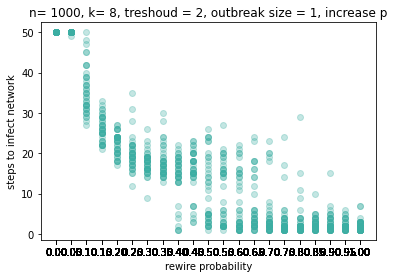

In [6]:
import matplotlib.pyplot as plt
from runtime import *

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("steps to infect network")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

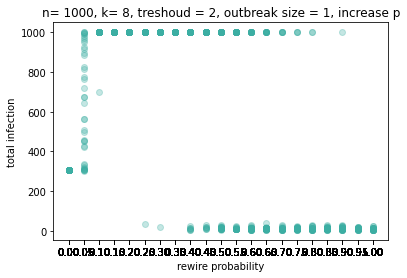

In [7]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewire probability")
plt.ylabel("total infection")
plt.title("n= 1000, k= 8, treshoud = 2, outbreak size = 1, increase p")
plt.xticks(x)
plt.show()

### 2.3 Testing batch run with changing rewireing factor

In [ ]:
#batch running test 2
from mesa.batchrunner import BatchRunner

#num_nodes=10, avg_node_degree=3, rewire_prob=.1, initial_outbreak_size=1, threshold = 2
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"num_nodes": 80,
               "avg_node_degree": 8,
               "initial_outbreak_size" : 1,
               "threshold" : 2}
variable_params = {"rewire_prob": rewire_list}  #  {"rewire_prob": drange(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()
#run_data

In [ ]:
import matplotlib.pyplot as plt
import numpy

In [ ]:

x = run_data['rewire_prob'].values.tolist()
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3',alpha = 0.3)

In [ ]:
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#ED553B', alpha = 0.3)

## 3 - Centola Replication

In [ ]:
from mesa.batchrunner import BatchRunner

In [ ]:
#num_nodes=40000, avg_node_degree=8, rewire_prob=a changing, initial_outbreak_size=1, threshold = 3
rewire_list = []
for i in range(201):
    rewire_list.append(round((i*0.005),4))

fixed_params = {"avg_node_degree":8,
                "num_nodes": 1000,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {
                      "rewire_prob": [0.000001, 0.00001,0.0001,0.001,0.01,0.1,1]
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=1,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

In [ ]:
run_data = batch_run.get_model_vars_dataframe()
run_data

In [ ]:
time = calculate_infection_time(run_data)

In [ ]:
time

In [ ]:
plt.plot(run_data.rewire_prob,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xscale('log')
plt.show()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
x = run_data.rewire_prob
time = calculate_infection_time(run_data)
plt.plot(x,time,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("rewiring probability")
plt.ylabel("steps to infect network")
plt.title("40 agents, 8 avergae neighbors, 3 treshold")
plt.xticks(x)
plt.xscale('log')
plt.show()

In [ ]:
x = run_data['rewire_prob'].values.tolist()
inf = calculate_total_infection(run_data)
plt.plot(x,inf,'o', color = '#3CAEA3', alpha = 0.3)
plt.xlabel("average node degree")
plt.ylabel("total infection")
plt.title("control rewire prob = 0.15, treshoud = 2, outbreak size = 2,")
plt.xticks(x)
plt.xscale('log')
plt.show()

In [ ]:
#num_nodes=240000, avg_node_degree=48, rewire_prob=a changing, initial_outbreak_size=1, threshold = 19
rewire_list = []
for i in range(21):
    rewire_list.append(round((i*0.05),3))
#rewire_list = [0, 0.1, 0.2, 0.3]

fixed_params = {"rewire_prob":0.15,
                "num_nodes": 80,
               "initial_outbreak_size" : 1,
                "threshold" : 2
                }
variable_params = {"avg_node_degree": range(2,20)
                  
                  }  #  {"rewire_prob": range(0.05, 1.0, 0.05)}

batch_run = BatchRunner(InfoSpread,
                        variable_params,
                        fixed_params,
                        iterations=5,
                        max_steps=10,
                        model_reporters={"infection_list": infected_list})
batch_run.run_all()

## 4 - Making a visualization Server (Doesn't work)

In [ ]:
chart = ChartModule([
        {"Label": "Infected", "Color": "#FF0000"},
        {"Label": "Susceptible", "Color": "#008000"},
        {"Label": "Resistant", "Color": "#808080"},
    ])

server = ModularServer(InfoSpread,
                       [ MyTextElement(), chart],
                       "Complex Comtagion Batch Run")

In [ ]:
server.port = 8521 # The default
server.launch()